**Prevendo valores de imóveis** 📈

Na aula de hoje, vamos explorar um dataset que contém algumas características sobre imóveis, tais como area, andar, suites, vista, e entre outros atributos.

Nosso desafio de hoje será tentar encontrar uma forma de criar um algortimo preditivo que utilize essas características para predizer o valor do imóvel, será que é possível?

**Atributos:**

* Ordem: Coluna de ID.
* Valor: Valor do imóvel.
* Area: Tamanho da área do imóvel.
* IA: Idade do imóvel.
* Andar: Quantidade de andares.
* Suites: Quantidade de suítes.
* Vista: Se o imóvel possúi uma boa vista ou não.
* DistBM: Distancia do Imovel do Mar.
* SemRuido: Se o imóvel é localizado em uma região calma ou não.
* AV100m: DistPróximo à área verde.

Vamos começar a trabalhar com os dados!

In [1]:
# importanto as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [4]:
# Subindo a base de dados:
imoveis= pd.read_csv(r'C:\Users\AMD\Documents\Projetos\PosTechDataScience_Fiap\02_Machine_Learning_and _Time_Siries\03_Avaliando_Modelos\Bases\Valorizacao_Ambiental.csv', sep=';')


In [5]:
# visualizando alguns dados
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [6]:
# Analisando linhas e colunas
imoveis.shape

(172, 10)

In [7]:
# Analisando valores nulas na base
imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [8]:
# descritivo das variáveis: medidas resumo
imoveis.describe().round(2) 


,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


# Identificando a variável target:

Text(0.5, 1.0, 'Histograma Valor')

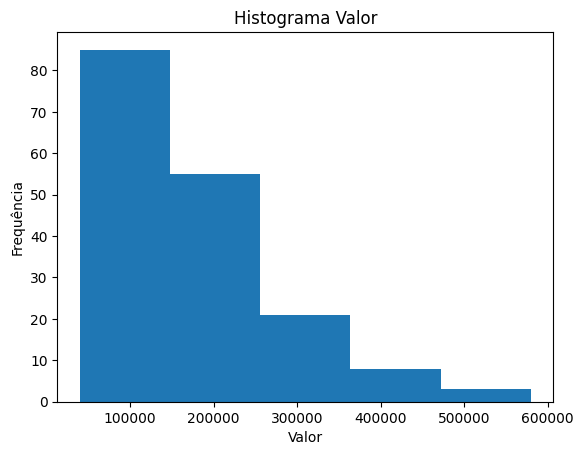

In [9]:
# Histograma da variável target

plt.hist(imoveis['Valor'], bins=5)

plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma Valor')



Vamos transformar o formato da variável principal para raiz quadrada.

Visualizar dados no formato da raiz quadrada pode ser uma boa opção! A transformação pode ajudar a mostrar a relação proporcional entre diferentes quantidades de uma maneira mais clara e intuitiva.

Utilizando a transformação da escala em raiz quadrada, o valor será ajustada de forma que os valores menores sejam ampliados em relação aos valores maiores.

In [10]:
imoveis['raiz_valor'] = np.sqrt(imoveis['Valor'])

Text(0.5, 1.0, 'Histograma raiz_valor')

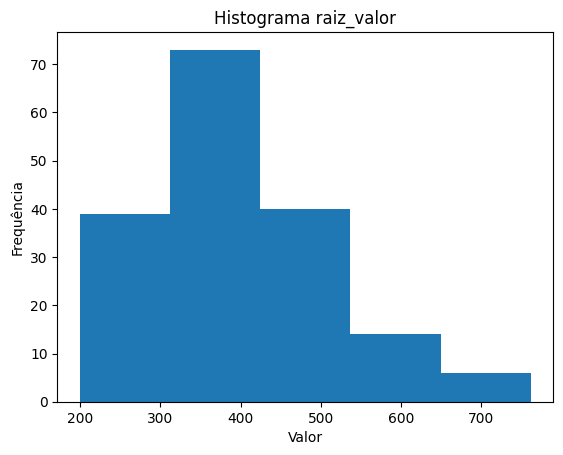

In [11]:
# Histograma da variável target 

plt.hist(imoveis['raiz_valor'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma raiz_valor')

# Analisando as variáveis quantitativas

Como próximo passo, vamos analisar nossas variáveis quantitativas.

Antes de construir nosso modelo, é muito importante avaliar se nesse caso podemos ter outliers ou valores extremos.

Text(0, 0.5, 'Suites')

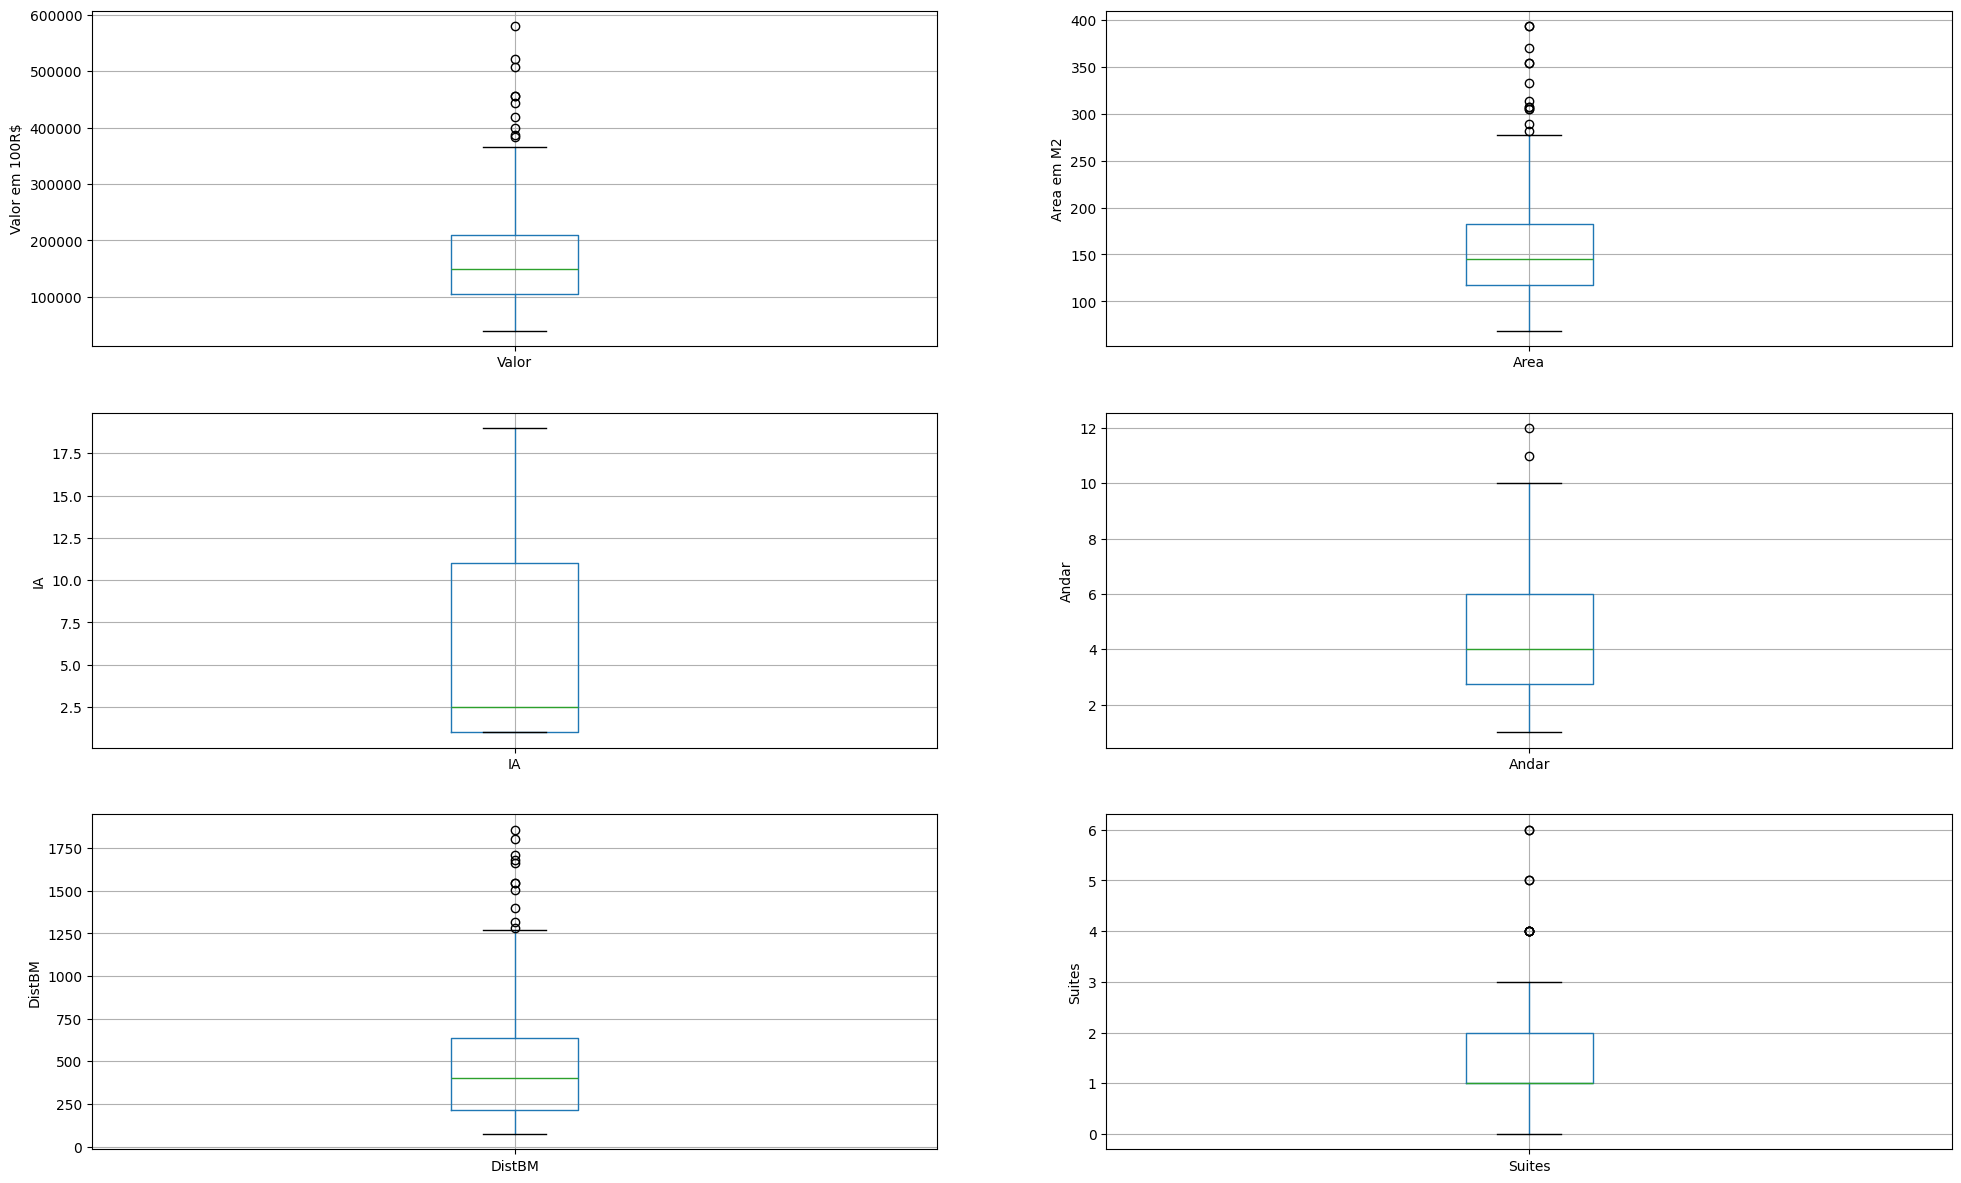

In [12]:
# Avaliando as variáveis quantitativas Boxplot: para visualizar Outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column='Valor')
fig.set_title('')
fig.set_ylabel('Valor em 100R$')


plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column='Area')
fig.set_title('')
fig.set_ylabel('Area em M2')


plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column='IA')
fig.set_title('')
fig.set_ylabel('IA')

plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column='Andar')
fig.set_title('')
fig.set_ylabel('Andar')

plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column='DistBM')
fig.set_title('')
fig.set_ylabel('DistBM')

plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column='Suites')
fig.set_title('')
fig.set_ylabel('Suites')




# Analisando correlações

Analisando as correlaçãoes:

Correlação de Pearson - quando as variáveis são núméricas quantitativas
- ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
- ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
- ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
- ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
- ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

<Axes: >

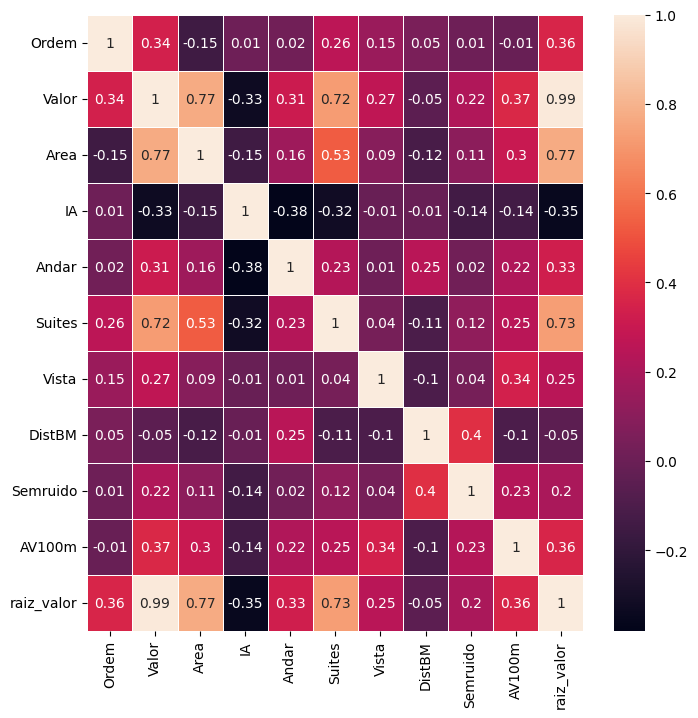

In [13]:
correlation_matrix = imoveis.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Analisando as correlações entre as variáveis e a target:

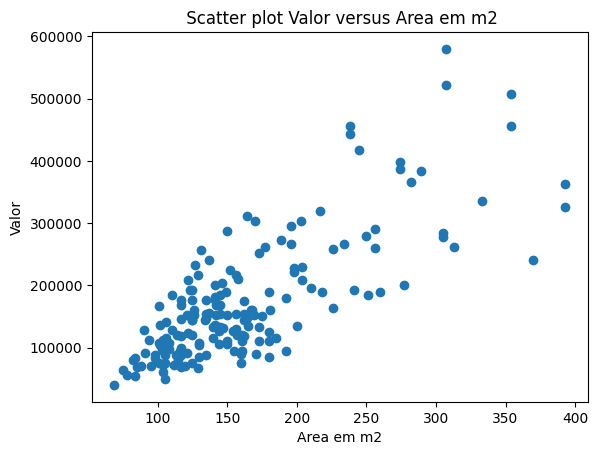

In [14]:
# Em uma análise descritiva sempre utilizar a variável Target - De acordo com o objetivo
# gráfico quando a variável preditora quantitativa 

# Gráfico de dispersão ou scatterplot
plt.scatter('Area', 'Valor', data=imoveis)
plt.xlabel("Area em m2")
plt.ylabel("Valor")
plt.title(" Scatter plot Valor versus Area em m2");

Percebam que quanto maior o área do imovel maior o valor em média.

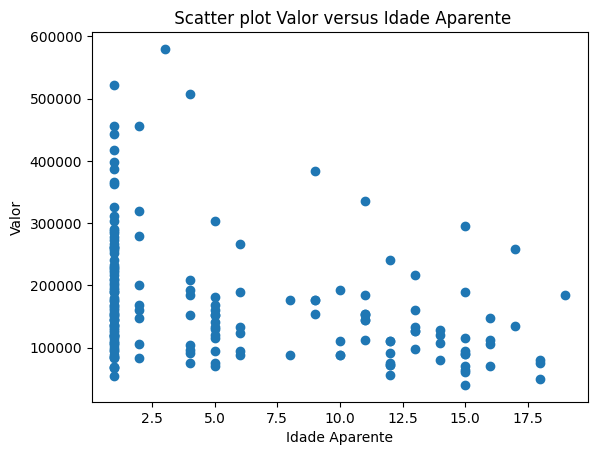

In [ ]:
plt.scatter('IA', 'Valor', data=imoveis)
plt.xlabel("Idade Aparente")
plt.ylabel("Valor")
plt.title(" Scatter plot Valor versus Idade Aparente");

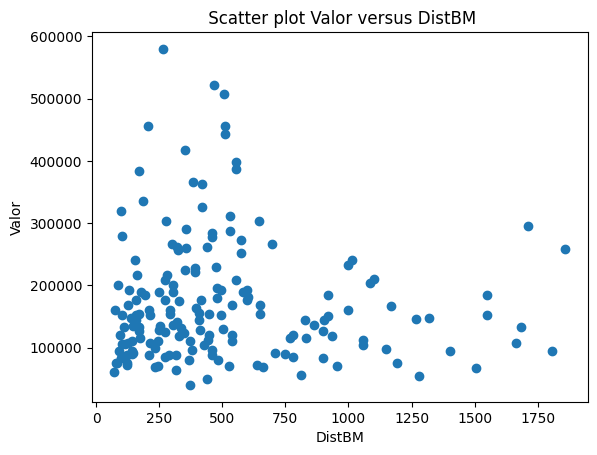

In [15]:
plt.scatter('DistBM', 'Valor', data=imoveis)
plt.xlabel("DistBM")
plt.ylabel("Valor")
plt.title(" Scatter plot Valor versus DistBM");

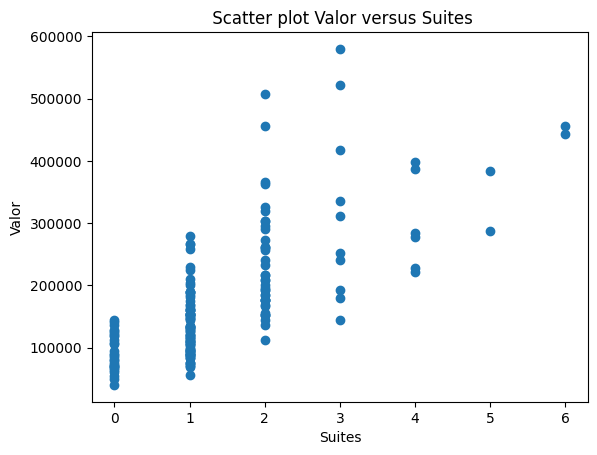

In [16]:
plt.scatter('Suites', 'Valor', data=imoveis)
plt.xlabel("Suites")
plt.ylabel("Valor")
plt.title(" Scatter plot Valor versus Suites");

# Analisando variáveis qualitativas

Analisando as variáveis qualitativas:

C:\Users\AMD\AppData\Local\Temp\ipykernel_26408\1085785526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Vista', y='Valor', data=imoveis, palette='hls');


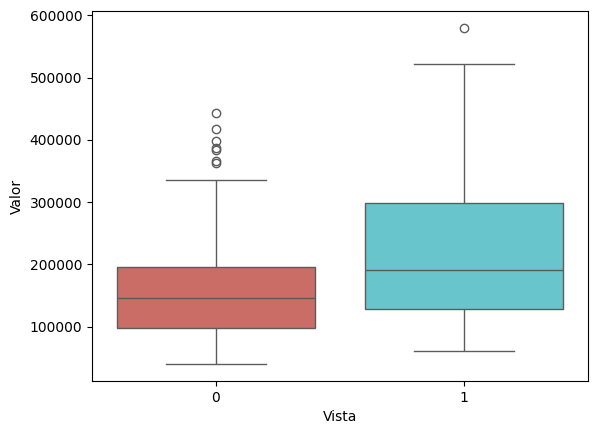

In [17]:
# Variáveis qualitativa com a variável Target

# Boxplot da variável Valor versus a variável Vista
sb.boxplot(x='Vista', y='Valor', data=imoveis, palette='hls');

Veja no gráfico acima que os valores dos imoveis que possuem Vista Panorâmica são bem maiores.

C:\Users\AMD\AppData\Local\Temp\ipykernel_26408\392096414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Semruido', y='Valor', data=imoveis, palette='hls')


<Axes: xlabel='Semruido', ylabel='Valor'>

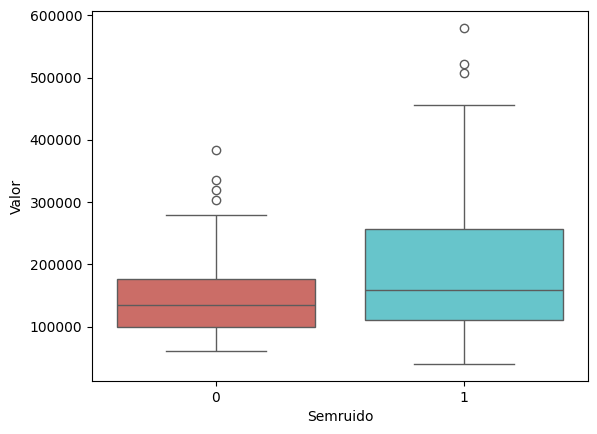

In [19]:
# Boxplot da variável Valor versus a variável Semruido
sb.boxplot(x='Semruido', y='Valor', data=imoveis, palette='hls')

C:\Users\AMD\AppData\Local\Temp\ipykernel_26408\3600903404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='AV100m', y='Valor', data=imoveis, palette='hls')


<Axes: xlabel='AV100m', ylabel='Valor'>

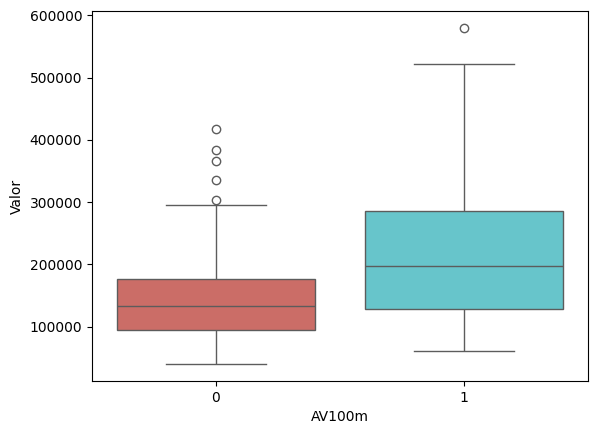

In [20]:
# Boxplot da variável Valor versus a variável AV100m
sb.boxplot(x='AV100m', y='Valor', data=imoveis, palette='hls')

C:\Users\AMD\AppData\Local\Temp\ipykernel_26408\2191187572.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(imoveis[(imoveis.AV100m == 1)]["Valor"],color='r',ax=ax)
C:\Users\AMD\AppData\Local\Temp\ipykernel_26408\2191187572.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(imoveis[(imoveis.AV

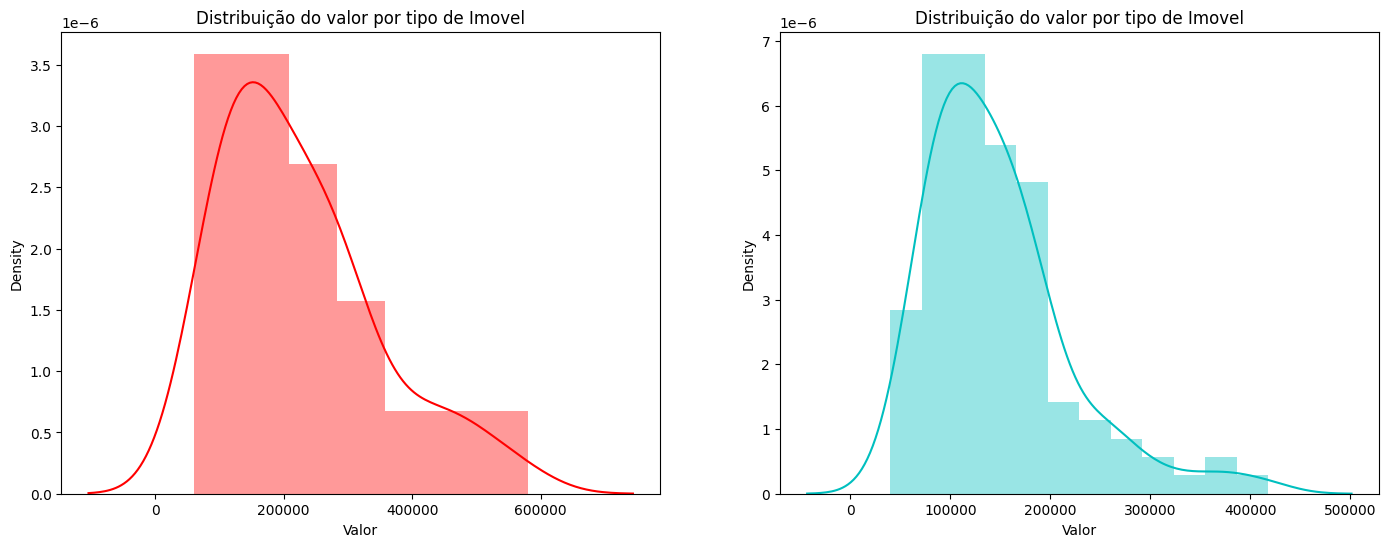

In [21]:
#Distruição de Gastos por Area Verde próxima
fig= plt.figure(figsize=(17,6))

ax=fig.add_subplot(121)
sb.distplot(imoveis[(imoveis.AV100m == 1)]["Valor"],color='r',ax=ax)
ax.set_title('Distribuição do valor por tipo de Imovel');

ax=fig.add_subplot(122)
sb.distplot(imoveis[(imoveis.AV100m == 0)]['Valor'],color='c',ax=ax)
ax.set_title('Distribuição do valor por tipo de Imovel');

# Realisando testes estatísticos:


Será que o valor é afetado por imóveis sem ruídos? Vamos comprovar com o teste estatístico Qui-Quadrado.

O teste Qui-Quadrado é uma técnica estatística utilizada para avaliar a associação entre duas variáveis categóricas em uma tabela de contingência.

Ele pode ser utilizado para testar a hipótese de que não há relação entre as duas variáveis ou para identificar se uma variável afeta a outra.

Nesse caso, estamos buscando descobrir a associação entre duas variáveis:  faixa valor (qualitativa ordinal) vs Semruido(qualitativa ordinal).

Para transformar a coluna de valor (quantitativa), vamos criar uma faixa de valores utilizando os quartis.




In [22]:
# Criar uma variável outlier_renda no Data Frame, sendo 0 = não outlier, 1= outlier e 2 = ponto extremo 
#minimo = min.(df['total'])   
Q1 =  np.percentile(imoveis['Valor'], 25)
Q2 =  np.percentile(imoveis['Valor'], 50)
Q3 =  np.percentile(imoveis['Valor'], 75)
maximo = max(imoveis['Valor'])    
print(Q1, Q2, Q3, maximo)


104750.0 149000.0 209250.0 579840


In [23]:
imoveis.loc[(imoveis.Valor >= 0) & (imoveis.Valor <= Q1), 'fx_total']=1.0
imoveis.loc[(imoveis.Valor > Q1) & (imoveis.Valor <= Q2), 'fx_total']=2.0
imoveis.loc[(imoveis.Valor>  Q2)  & (imoveis.Valor <=Q3), 'fx_total']=3.0
imoveis.loc[(imoveis.Valor >  Q3) & (imoveis.Valor <= maximo), 'fx_total']=4.0

C:\Users\AMD\AppData\Local\Temp\ipykernel_26408\1068393827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='fx_total', y='Valor', data=imoveis, palette='hls')


<Axes: xlabel='fx_total', ylabel='Valor'>

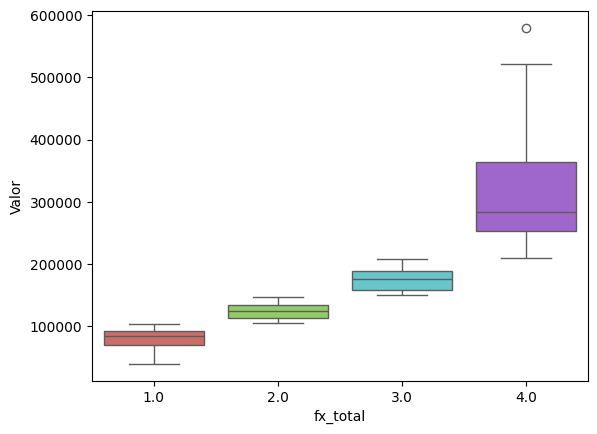

In [24]:
# Boxplot da variável Valor versus a variável categoria de valor
sb.boxplot(x='fx_total', y='Valor', data=imoveis, palette='hls')

In [25]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ordem       172 non-null    int64  
 1   Valor       172 non-null    int64  
 2   Area        172 non-null    int64  
 3   IA          172 non-null    int64  
 4   Andar       172 non-null    int64  
 5   Suites      172 non-null    int64  
 6   Vista       172 non-null    int64  
 7   DistBM      172 non-null    int64  
 8   Semruido    172 non-null    int64  
 9   AV100m      172 non-null    int64  
 10  raiz_valor  172 non-null    float64
 11  fx_total    172 non-null    float64
dtypes: float64(2), int64(10)
memory usage: 16.3 KB


Vamos criar uma tabela de contigência para validar nossa hipótese.

Uma tabela de contingência é uma tabela que resume a frequência de ocorrência de cada combinação possível de valores de duas variáveis categóricas. 


In [26]:
# crosstab tabela cruzada entre duas variáveis qualitativas

pd.crosstab(imoveis.fx_total,imoveis.Semruido, margins=True)

Semruido,0,1,All
fx_total,,,
1.0,20,23,43
2.0,22,21,43
3.0,21,22,43
4.0,9,34,43
All,72,100,172


In [27]:
# Uma variável sem_ruído
(imoveis.Semruido.value_counts() / imoveis.shape[0]) * 100

Semruido
1    58.139535
0    41.860465
Name: count, dtype: float64

In [29]:
table = pd.crosstab(imoveis.fx_total,imoveis.Semruido)

In [30]:
print(table)

Semruido   0   1
fx_total        
1.0       20  23
2.0       22  21
3.0       21  22
4.0        9  34


Utilizando a biblioteca **SciPy** que é uma biblioteca de computação científica em Python que fornece um conjunto de ferramentas para matemática, ciência e engenharia.

A função chi2_contingency calcula a estatística do qui-quadrado e o valor p para a tabela de contingência fornecida. A estatística do qui-quadrado é uma medida da discrepância entre a distribuição observada e a distribuição esperada sob a hipótese nula de independência das duas variáveis. O valor p é a probabilidade de obter uma estatística do qui-quadrado tão extrema quanto a observada, sob a hipótese nula.

Em geral, um valor de p menor que 0,05 (ou 0,01, dependendo do contexto) é frequentemente considerado como uma evidência forte contra a hipótese nula, e um valor de p maior que 0,10 geralmente é considerado como uma evidência fraca.



In [31]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [32]:
# dof degree of freedom
# p p-value 
stat, p, dof, expected = chi2_contingency(table)
p


0.014685713198671485

####   Teste de hipótese:
    H0: não há relação entre valor e ruído
    H1: há relação entre valor e ruído
    α = 0,05 (5%)



In [33]:
print('Graus de liberdade: dof=%d' % dof)

print('\n Tabela Esperada:')
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)

print('\n probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
	print('\n Dependent (reject H0)')
else:
	print('\n Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('\n significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('\n Dependent (reject H0)')
else:
	print('\n Independent (fail to reject H0)')

Graus de liberdade: dof=3

 Tabela Esperada:
[[18. 25.]
 [18. 25.]
 [18. 25.]
 [18. 25.]]

 probability=0.950, critical=7.815, stat=10.511

 Dependent (reject H0)

 significance=0.050, p=0.015

 Dependent (reject H0)


In [34]:
!pip install researchpy
import researchpy

   ---------------------------------------- 0.0/234.1 kB ? eta -:--:--
   -------------------------------------- - 225.3/234.1 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 234.1/234.1 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.2/9.8 MB 39.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.3/9.8 MB 55.0 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.8 MB 53.0 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 51.1 MB/s eta 0:00:01
   -------------------------------------- - 9.6/9.8 MB 43.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 37.1 MB/s eta 0:00:00


In [35]:
results1 = researchpy.crosstab(imoveis['fx_total'],imoveis['Semruido'], test='chi-square')

c:\Users\AMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 3.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


In [36]:
results1

(         Semruido          
 Semruido        0    1  All
 fx_total                   
 1.0            20   23   43
 2.0            22   21   43
 3.0            21   22   43
 4.0             9   34   43
 All            72  100  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =   10.5111
 1                    p-value =    0.0147
 2                 Cramer's V =    0.2472)

In [37]:
results2 = researchpy.crosstab(imoveis['fx_total'],imoveis['Vista'], test='chi-square')

c:\Users\AMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 3.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


In [38]:
results2

(         Vista         
 Vista        0   1  All
 fx_total               
 1.0         41   2   43
 2.0         36   7   43
 3.0         39   4   43
 4.0         32  11   43
 All        148  24  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =    8.9099
 1                    p-value =    0.0305
 2                 Cramer's V =    0.2276)

In [39]:
results3 = researchpy.crosstab(imoveis['fx_total'],imoveis['AV100m'], test='chi-square')

c:\Users\AMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 3.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


In [40]:
results3

(         AV100m         
 AV100m        0   1  All
 fx_total                
 1.0          36   7   43
 2.0          30  13   43
 3.0          31  12   43
 4.0          15  28   43
 All         112  60  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =   25.1857
 1                    p-value =    0.0000
 2                 Cramer's V =    0.3827)

In [41]:
# Avaliando a variável Distancia do Imovel do Mar
Q1 =  np.percentile(imoveis['DistBM'], 25)
Q2 =  np.percentile(imoveis['DistBM'], 50)
Q3 =  np.percentile(imoveis['DistBM'], 75)
maximo = max(imoveis['DistBM' ])    
print(Q1, Q2, Q3, maximo)

214.75 402.5 638.0 1859


In [42]:
imoveis.loc[(imoveis.DistBM >= 0) & (imoveis.DistBM <= Q1), 'fx_DistBM']=1.0
imoveis.loc[(imoveis.DistBM > Q1) & (imoveis.DistBM <= Q2), 'fx_DistBM']=2.0
imoveis.loc[(imoveis.DistBM>  Q2)  & (imoveis.DistBM <=Q3), 'fx_DistBM']=3.0
imoveis.loc[(imoveis.DistBM >  Q3) & (imoveis.DistBM <= maximo), 'fx_DistBM']=4.0

C:\Users\AMD\AppData\Local\Temp\ipykernel_26408\2401049762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='fx_DistBM', y='DistBM', data=imoveis, palette='hls')


<Axes: xlabel='fx_DistBM', ylabel='DistBM'>

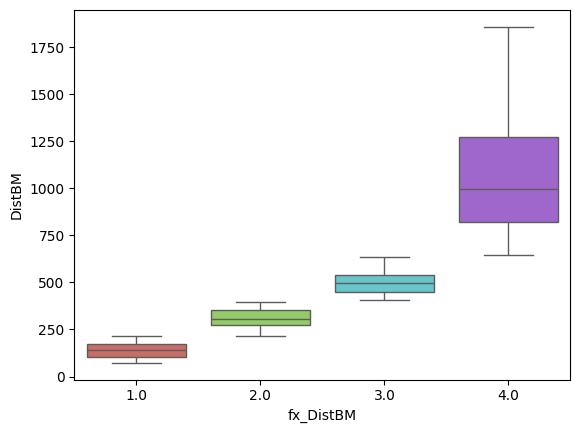

In [43]:
# Boxplot da variável Valor versus a variável categoria de valor
sb.boxplot(x='fx_DistBM', y='DistBM', data=imoveis, palette='hls')

In [44]:
results4 = researchpy.crosstab(imoveis['fx_total'],imoveis['fx_DistBM'], test='chi-square')

c:\Users\AMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 9.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


In [45]:
results4

(          fx_DistBM                 
 fx_DistBM       1.0 2.0 3.0 4.0  All
 fx_total                            
 1.0              12  10   7  14   43
 2.0              12  11   7  13   43
 3.0              12   9  13   9   43
 4.0               7  13  16   7   43
 All              43  43  43  43  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 9.0) =   11.2558
 1                    p-value =    0.2586
 2                 Cramer's V =    0.1477)

In [46]:
results5 = researchpy.crosstab(imoveis['fx_total'],imoveis['Area'], test='chi-square')

c:\Users\AMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 297.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


In [47]:
results5

(         Area                             ...                                  \
 Area       69 75 78 82 84 85 88 90 91 94  ... 282 289 305 307 313 333 354 370   
 fx_total                                  ...                                   
 1.0         1  1  1  1  2  1  1  0  1  0  ...   0   0   0   0   0   0   0   0   
 2.0         0  0  0  0  0  0  0  1  0  1  ...   0   0   0   0   0   0   0   0   
 3.0         0  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
 4.0         0  0  0  0  0  0  0  0  0  0  ...   1   1   2   2   1   1   2   1   
 All         1  1  1  1  2  1  1  1  1  1  ...   1   1   2   2   1   1   2   1   
 
                    
 Area     393  All  
 fx_total           
 1.0        0   43  
 2.0        0   43  
 3.0        0   43  
 4.0        2   43  
 All        2  172  
 
 [5 rows x 101 columns],
                   Chi-square test   results
 0  Pearson Chi-square ( 297.0) =   351.7143
 1                      p-value =     0.0159
 2          

In [48]:
results6 = researchpy.crosstab(imoveis['fx_total'],imoveis['IA'], test='chi-square')

c:\Users\AMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 51.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


In [49]:
results6

(          IA                                                          
 IA         1  2  3  4   5  6  8  9 10 11 12 13 14  15 16 17 18 19  All
 fx_total                                                              
 1.0       12  1  0  4   3  2  1  0  2  0  5  1  1   7  1  0  3  0   43
 2.0       17  2  0  0   5  2  0  0  1  3  2  3  3   1  3  1  0  0   43
 3.0       18  3  0  4   5  1  1  3  1  4  0  1  0   1  0  0  0  1   43
 4.0       30  3  1  1   1  1  0  1  0  1  1  1  0   1  0  1  0  0   43
 All       77  9  1  9  14  6  2  4  4  8  8  6  4  10  4  2  3  1  172,
                  Chi-square test  results
 0  Pearson Chi-square ( 51.0) =   83.5763
 1                     p-value =    0.0027
 2                  Cramer's V =    0.4025)

In [50]:
results7 = researchpy.crosstab(imoveis['fx_total'],imoveis['Andar'], test='chi-square')

c:\Users\AMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 33.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


In [51]:
results7

(         Andar                                           
 Andar        1   2   3   4   5   6  7  8  9 10 11 12  All
 fx_total                                                 
 1.0          9  10   9   2   7   3  2  0  1  0  0  0   43
 2.0          3  12   7   4   6   4  3  1  2  1  0  0   43
 3.0          0   6   9   6   7  10  1  2  1  0  0  1   43
 4.0          0   3   7   8   8   8  1  6  1  0  1  0   43
 All         12  31  32  20  28  25  7  9  5  1  1  1  172,
                  Chi-square test  results
 0  Pearson Chi-square ( 33.0) =   54.7097
 1                     p-value =    0.0102
 2                  Cramer's V =    0.3256)

# Criando o modelo de regressão linear

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [52]:
# Regressão linear múltipla
from sklearn.linear_model import LinearRegression

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

In [53]:
imoveis.head(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor,fx_total,fx_DistBM
0,1,160000,168,1,5,1,1,294,1,0,400.000000,3.0,2.0
1,2,67000,129,1,6,0,0,1505,1,0,258.843582,1.0,4.0


In [54]:
# X contem as variáveis preditoras ou independentes
X = imoveis[['Area','Suites', 'IA', 'Semruido', 'Vista', 'Andar','AV100m','DistBM']]


# y variável target ou dependente
y = imoveis[['Valor']]

In [55]:
from sklearn.model_selection import train_test_split

#Separando os dados de Treino e Teste
# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [56]:
#Treinando o Modelo
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
# Calculando o valor predito da variável resposta na amostra teste 
y_pred = lr.predict(X_test)

In [58]:
#Verificando o resultado
r_sq = lr.score(X, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.806035427607881


In [59]:
# Primeiro, vamos olhar o Intercepto e os Coeficientes da Regressão.

print('Intercepto:', lr.intercept_)

Intercepto: [-40165.8752773]


In [60]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,Area,815.218075
1,Suites,34315.785459
2,IA,-1052.417100
3,Semruido,17027.508944
4,Vista,63486.030935
5,Andar,5635.237485
6,AV100m,-5672.535051
7,DistBM,-2.522530


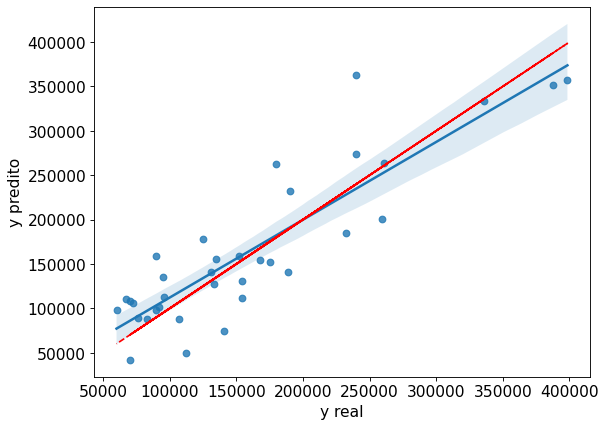

In [61]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 14})
ax = sb.regplot(x = y_test, y = y_pred)
ax.set(xlabel='y real', ylabel='y predito')
ax = plt.plot(y_test, y_test, '--r')

plt.show()

# Validando a performance do modelo

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE',MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
print('MSE',MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
print('r²',r2) # (R-quadrado)

MAE 34422.98857094568
MSE 1844288772.1790047
r² 0.758459196912501


# Avaliando com DecisionTreeRegressor

Observamos que nosso modelo de regressão linear se comportou bem, mas e se tentarmos criar um novo modelo sob um outro tipo de algoritmo diferente?

Um modelo de DecisionTreeRegressor é um modelo de árvore de decisão utilizado para resolver problemas de regressão. Esse tipo de técnica cria uma estrutura em forma de árvore para mapear relações não lineares entre as variáveis preditoras e a variável alvo.

Vamos testar?

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
# Criando o modelo de DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=7, max_depth=10)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=7)

In [66]:
y_pred_model_dtr = model_dtr.predict(X_test)

In [67]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)
print('MAE',MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
print('MSE',MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
print('r²',r2) # (R-quadrado)

MAE 39338.92244897959
MSE 2532451627.6991253
r² 0.6683326336081382


# Avaliando com SVR

Vamos agora testar um outro tipo de algoritmo para analisar a performace, o Support Vector Regression. O SVR, é usado para tarefas de regressão, em que a tarefa é prever um valor contínuo em vez de uma classe.

In [68]:
from sklearn.svm import SVR

In [69]:
# Criando o modelo de SVM
svr = SVR(kernel='linear')

In [70]:
svr.fit(X_train, y_train)

c:\Users\AMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [71]:
y_pred_svr = svr.predict(X_test)

In [72]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
print('MAE',MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
print('MSE',MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
print('r²',r2) # (R-quadrado)

MAE 43153.53918496288
MSE 3123421996.7782364
r² 0.5909350700044546


Com base em alguns dos nossos testes, podemos concluir que o modelo de regressão linear performou melhor do que os demais modelo!